# Project: Wrangling and Analyze Data

#### Import Libraries

In [1974]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import glob
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1975]:
df_archive = pd.read_csv('twitter_archive_enhanced.csv')
df_archive.set_index('tweet_id').head()

in_reply_to_status_id  in_reply_to_user_id  \
tweet_id                                                         
892420643555336193                    NaN                  NaN   
892177421306343426                    NaN                  NaN   
891815181378084864                    NaN                  NaN   
891689557279858688                    NaN                  NaN   
891327558926688256                    NaN                  NaN   

                                    timestamp  \
tweet_id                                        
892420643555336193  2017-08-01 16:23:56 +0000   
892177421306343426  2017-08-01 00:17:27 +0000   
891815181378084864  2017-07-31 00:18:03 +0000   
891689557279858688  2017-07-30 15:58:51 +0000   
891327558926688256  2017-07-29 16:00:24 +0000   

                                                                                                source  \
tweet_id                                                                                                 
892420643555336193  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
892177421306343426  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
891815181378084864  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
891689557279858688  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
891327558926688256  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                                  text  \
tweet_id                                                                                                                                                                                 
892420643555336193                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
892177421306343426  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
891815181378084864                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
891689557279858688                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
891327558926688256  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

                    retweeted_status_id  retweeted_status_user_id  \
tweet_id                                                            
892420643555336193                  NaN                       NaN   
892177421306343426                  NaN                       NaN   
891815181378084864                  NaN                       NaN   
891689557279858688                  NaN                       NaN   
891327558926688256                  NaN                       NaN   

                   retweeted_status_timestamp  \
tweet_id                                        
892420643555336193                        NaN   
892177421306343426                        NaN   
891815181378084864                        NaN   
891689557279858688                        NaN   
891327558926688256                        NaN   

                                                                                                                                      expanded_urls  \
tweet_id                                                                                                                                              
892420643555336193                   

In [1976]:
df_archive.shape

(2356, 17)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [1977]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)

In [1978]:
open('image_predictions.tsv', 'wb').write(r.content)

df_prediction = pd.read_csv('image_predictions.tsv', sep = '\t')
df_prediction.set_index('tweet_id').head()

jpg_url  img_num  \
tweet_id                                                                       
666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg        1   
666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg        1   
666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg        1   
666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg        1   
666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg        1   

                                        p1   p1_conf  p1_dog  \
tweet_id                                                       
666020888022790149  Welsh_springer_spaniel  0.465074    True   
666029285002620928                 redbone  0.506826    True   
666033412701032449         German_shepherd  0.596461    True   
666044226329800704     Rhodesian_ridgeback  0.408143    True   
666049248165822465      miniature_pinscher  0.560311    True   

                                    p2   p2_conf  p2_dog                   p3  \
tweet_id                                                                        
666020888022790149              collie  0.156665    True    Shetland_sheepdog   
666029285002620928  miniature_pinscher  0.074192    True  Rhodesian_ridgeback   
666033412701032449            malinois  0.138584    True           bloodhound   
666044226329800704             redbone  0.360687    True   miniature_pinscher   
666049248165822465          Rottweiler  0.243682    True             Doberman   

                     p3_conf  p3_dog  
tweet_id                              
666020888022790149  0.061428    True  
666029285002620928  0.072010    True  
666033412701032449  0.116197    True  
666044226329800704  0.222752    True  
666049248165822465  0.154629    True

In [1979]:
df_prediction.shape

(2075, 12)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [1980]:
with open('tweet_json.txt') as file:
    df_tweet = pd.DataFrame((json.loads(line) for line in file), columns = ['id', 'favorite_count', 'retweet_count'])
        


In [1981]:
df_tweet.columns = ['tweet_id', 'favorites_counts', 'retweet_count']
df_tweet.set_index('tweet_id').head()

favorites_counts  retweet_count
tweet_id                                           
892420643555336193             39467           8853
892177421306343426             33819           6514
891815181378084864             25461           4328
891689557279858688             42908           8964
891327558926688256             41048           9774

In [1982]:
df_tweet.shape

(2354, 3)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Assessing the df_archive data

In [1983]:
df_archive.head(50)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0   892420643555336193                    NaN                  NaN   
1   892177421306343426                    NaN                  NaN   
2   891815181378084864                    NaN                  NaN   
3   891689557279858688                    NaN                  NaN   
4   891327558926688256                    NaN                  NaN   
5   891087950875897856                    NaN                  NaN   
6   890971913173991426                    NaN                  NaN   
7   890729181411237888                    NaN                  NaN   
8   890609185150312448                    NaN                  NaN   
9   890240255349198849                    NaN                  NaN   
10  890006608113172480                    NaN                  NaN   
11  889880896479866881                    NaN                  NaN   
12  889665388333682689                    NaN                  NaN   
13  889638837579907072                    NaN                  NaN   
14  889531135344209921                    NaN                  NaN   
15  889278841981685760                    NaN                  NaN   
16  888917238123831296                    NaN                  NaN   
17  888804989199671297                    NaN                  NaN   
18  888554962724278272                    NaN                  NaN   
19  888202515573088257                    NaN                  NaN   
20  888078434458587136                    NaN                  NaN   
21  887705289381826560                    NaN                  NaN   
22  887517139158093824                    NaN                  NaN   
23  887473957103951883                    NaN                  NaN   
24  887343217045368832                    NaN                  NaN   
25  887101392804085760                    NaN                  NaN   
26  886983233522544640                    NaN                  NaN   
27  886736880519319552                    NaN                  NaN   
28  886680336477933568                    NaN                  NaN   
29  886366144734445568                    NaN                  NaN   
30  886267009285017600           8.862664e+17         2.281182e+09   
31  886258384151887873                    NaN                  NaN   
32  886054160059072513                    NaN                  NaN   
33  885984800019947520                    NaN                  NaN   
34  885528943205470208                    NaN                  NaN   
35  885518971528720385                    NaN                  NaN   
36  885311592912609280                    NaN                  NaN   
37  885167619883638784                    NaN                  NaN   
38  884925521741709313                    NaN                  NaN   
39  884876753390489601                    NaN                  NaN   
40  884562892145688576                    NaN                  NaN   
41  884441805382717440                    NaN                  NaN   
42  884247878851493888                    NaN                  NaN   
43  884162670584377345                    NaN                  NaN   
44  883838122936631299                    NaN                  NaN   
45  883482846933004288                    NaN                  NaN   
46  883360690899218434                    NaN                  NaN   
47  883117836046086144                    NaN                  NaN   
48  882992080364220416                    NaN                  NaN   
49  882762694511734784                    NaN                  NaN   

                    timestamp  \
0   2017-08-01 16:23:56 +0000   
1   2017-08-01 00:17:27 +0000   
2   2017-07-31 00:18:03 +0000   
3   2017-07-30 15:58:51 +0000   
4   2017-07-29 16:00:24 +0000   
5   2017-07-29 00:08:17 +0000   
6   2017-07-28 16:27:12 +0000   
7   2017-07-28 00:22:40 +0000   
8   2017-07-27 16:25:51 +0000   
9   2017-07-26 15:59:51 +0000   
10  2017-07-26 00:31:25 +0000   
11  2017-07-25 16:11:53 +0000   
12  2017-07-25

In [1984]:
df_archive.shape

(2356, 17)

In [1985]:
df_archive.tweet_id.nunique()

2356

In [1986]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [1987]:
df_archive.duplicated().sum()

0

In [1988]:
df_archive.isnull().sum()


tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [1989]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [1990]:
pd.set_option('display.max_colwidth', None)

df_archive.expanded_urls.head(10)

0                                                                    https://twitter.com/dog_rates/status/892420643555336193/photo/1
1                                                                    https://twitter.com/dog_rates/status/892177421306343426/photo/1
2                                                                    https://twitter.com/dog_rates/status/891815181378084864/photo/1
3                                                                    https://twitter.com/dog_rates/status/891689557279858688/photo/1
4    https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1
5                                                                    https://twitter.com/dog_rates/status/891087950875897856/photo/1
6                        https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1
7    https://twitter.com/dog_rates/status/890729181411237888/photo/1,

In [1991]:
pd.set_option("display.max_rows", None)
df_archive.name.value_counts()

None              745
a                  55
Charlie            12
Cooper             11
Lucy               11
Oliver             11
Tucker             10
Penny              10
Lola               10
Winston             9
Bo                  9
Sadie               8
the                 8
Daisy               7
Buddy               7
Toby                7
an                  7
Bailey              7
Leo                 6
Oscar               6
Stanley             6
Rusty               6
Bella               6
Dave                6
Jack                6
Koda                6
Scout               6
Jax                 6
Milo                6
Louis               5
Phil                5
Sammy               5
Gus                 5
Chester             5
Alfie               5
Sunny               5
Bentley             5
very                5
Oakley              5
Finn                5
George              5
Larry               5
Clarence            4
Loki                4
Walter              4
Reggie    

In [1992]:
df_archive[['text', 'rating_numerator', 'rating_denominator']].sample(50)

text  \
521                           Please only send in dogs. We only rate dogs, not seemingly heartbroken ewoks. Thank you... still 10/10 would console https://t.co/HIraYS1Bzo   
793                                                                           This is Chelsea. She forgot how to dog. 11/10 get it together pupper https://t.co/nBJ5RE4yHb   
274                                                                                                               @0_kelvin_0 &gt;10/10 is reserved for puppos sorry Kevin   
1570                                                       This is Ember. That's the q-tip she owes money to. 11/10 pay up pup. (vid by @leanda_h) https://t.co/kGRcRjRJRl   
1898                           Meet Patrick. He's an exotic pup. Jumps great distances for a dog. Always gets injured when I toss him a ball. 3/10 https://t.co/Unz1uNrOzo   
160                                                                                     RT @tallylott: h*ckin adorable promposal. 13/10 @dog_rates https://t.co/6n8hzNihJ9   
897                                                           This is Spencer. He's part of the Queen's Guard. Takes his job very seriously. 11/10 https://t.co/8W5iSOgXfx   
244                                              Meet Jarvis. The snow pupsets him. Officially ready for summer. 12/10 would perform a chilly boop https://t.co/0hLkztpiOW   
329                                                                                 This is Poppy. She just arrived. 13/10 would snug passionately https://t.co/YGeSpyN8Gu   
1906                                                                           This is Louis. He thinks he's flying. 13/10 this is a legendary pup https://t.co/6d9WziPXmx   
1833                                                                                                         This is Bert. He likes flowers. 10/10 https://t.co/lmQRrNxaQu   
1567                                                  This is Louis. He's a rollercoaster of emotions. Incalculably fluffy. 12/10 would pet firmly https://t.co/17RGvOZO9P   
161   Meet Lorenzo. He's an avid nifty hat wearer and absolute 13/10, but he needs your help to beat cancer. Link below\n\nhttps://t.co/qZdSdzm08p https://t.co/oDIQ1KkdPt   
1896                                                                                                "üé∂ DO YOU BELIEVE IN LIFE AFTER LOVE üé∂"\n11/10 https://t.co/URNs5zFskc   
2108                                                                                                          This dog can't see its haters. 11/10 https://t.co/35BcGFdEAK   
1756                                                                                                  This is Mia. She makes awful decisions. 8/10 https://t.co/G6TQVgTcZz   
1601                                 This is Hammond. He's a peculiar pup. Loves long walks. Bark barely audible. Too many legs. 3/10 must be rare https://t.co/NOIiRWr5Jf   
1941                                This is a heavily opinionated dog. Loves walls. Nobody knows how the hair works. Always ready for a kiss. 4/10 https://t.co/dFiaKZ9cDl   
558                           RT @dog_rates: This is Philbert. His toilet broke and he doesn't know what to do. Trying not to panic. 11/10 furustrated af https://t.co/Nb‚Ä¶   
424                          This is Harlso. He has a really good idea but isn't sure you're going to like it. 13/10 he'll just keep it to himself https://t.co/IzcaR3Nqyn   
1312                                 This is Ellie. She requests to be carried around in a lacrosse stick at all times. 11/10 impossible to say no https://t.co/15yCmd43zU   
1079                            Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC   
2083                                           Meet Maggie. She enjoys her stick in the yard. Very content. Much tranquility. 10/10 keep it up pup https://t

In [1993]:
df_archive[df_archive.rating_numerator == 14].value_counts()

Series([], dtype: int64)

In [1994]:
df_archive.rating_denominator.min()

0

### Assessing the df_prediction data

In [1995]:
df_prediction.head(10)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5  666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6  666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7  666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8  666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9  666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   
5        1    Bernese_mountain_dog  0.651137    True    English_springer   
6        1              box_turtle  0.933012   False          mud_turtle   
7        1                    chow  0.692517    True     Tibetan_mastiff   
8        1           shopping_cart  0.962465   False     shopping_basket   
9        1        miniature_poodle  0.201493    True            komondor   

    p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0  0.156665    True            Shetland_sheepdog  0.061428    True  
1  0.074192    True          Rhodesian_ridgeback  0.072010    True  
2  0.138584    True                   bloodhound  0.116197    True  
3  0.360687    True           miniature_pinscher  0.222752    True  
4  0.243682    True                     Doberman  0.154629    True  
5  0.263788    True   Greater_Swiss_Mountain_dog  0.016199    True  
6  0.045885   False                     terrapin  0.017885   False  
7  0.058279    True                     fur_coat  0.054449   False  
8  0.014594   False             golden_retriever  0.007959    True  
9  0.192305    True  soft-coated_wheaten_terrier  0.082086    True

In [1996]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1997]:
df_prediction.duplicated(subset=['jpg_url']).sum()

66

In [1998]:
df_prediction.tweet_id.nunique()

2075

In [1999]:
pd.set_option('display.max_colwidth', None)

df_prediction.jpg_url.head(5)

0    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg
1    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg
2    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
3    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg
4    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg
Name: jpg_url, dtype: object

In [2000]:
df_prediction.jpg_url.value_counts()

https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg                                            2
https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg                                            2
https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg                                            2
https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg                                            2
https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg                                            2
https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg                       

In [2001]:
df_prediction[df_prediction.duplicated(subset=['jpg_url'], keep= False)].head()

tweet_id                                          jpg_url  \
85   667509364010450944  https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg   
224  670319130621435904  https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg   
241  670444955656130560  https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg   
327  671896809300709376  https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg   
382  673320132811366400  https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg   

     img_num                p1   p1_conf  p1_dog                  p2  \
85         1            beagle  0.636169    True  Labrador_retriever   
224        1     Irish_terrier  0.254856    True              briard   
241        1  English_springer  0.403698    True    Brittany_spaniel   
327        1              chow  0.243529    True             hamster   
382        3           Samoyed  0.978833    True          Pomeranian   

      p2_conf  p2_dog                           p3   p3_conf  p3_dog  
85   0.119256    True             golden_retriever  0.082549    True  
224  0.227716    True  soft-coated_wheaten_terrier  0.223263    True  
241  0.347609    True       Welsh_springer_spaniel  0.137186    True  
327  0.227150   False                   Pomeranian  0.056057    True  
382  0.012763    True                   Eskimo_dog  0.001853    True

In [2002]:
df_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

###### Assessinfg df_tweet dataset

In [2003]:
df_tweet.head()

tweet_id  favorites_counts  retweet_count
0  892420643555336193             39467           8853
1  892177421306343426             33819           6514
2  891815181378084864             25461           4328
3  891689557279858688             42908           8964
4  891327558926688256             41048           9774

In [2004]:
df_archive.shape, df_prediction.shape, df_tweet.shape

((2356, 17), (2075, 12), (2354, 3))

In [2005]:
df_tweet.tweet_id.nunique()

2354

In [2006]:
df_archive.tweet_id.nunique(), df_prediction.tweet_id.nunique(), df_tweet.tweet_id.nunique()

(2356, 2075, 2354)

In [2007]:
df_tweet[df_tweet.duplicated(subset=['tweet_id'], keep = False)].head()

Empty DataFrame
Columns: [tweet_id, favorites_counts, retweet_count]
Index: []

##### Quality issues
1. <p> Tweet_id should be object not an int

2. <p> Timestamp should be datetime not object

3. <p> There are 66 image that are duplicated

4. <p> There are some columns that caontains alot of null values

5. <p> the most common value in rating_denominator is 10, so other values should be either removed or changed

6. <p> some cells in expanded_urls contains more than 1 urls

7. <p> There are aound 745 None value in the name of the dogs which are Null values

8. <p> The number of tweet id is not consistent across of the three dataframes

##### Tidiness issues
1. <p> maybe this columns ['doggo', 'floofer', 'pupper', 'puppo'] should be transformed to dummy variable

2. <p> The data shouldbe in one table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

# Define 
<p>Merge the clean versions of df_twitter_archive, df_image_predictions, and tweet_json dataframes Correct the dog types
<p>Create one column for the various dog types: doggo, floofer, pupper, puppo Remove columns no longer needed: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
<p> Delete retweets
<p> Remove columns no longer needed
<p> Change tweet_id from an integer to a string
<p> Change the timestamp to correct datetime format
<p> Correct naming issues
<p> Standardize dog ratings
<p> Creating a new dog_breed column using the image prediction data

### Issue #1:

#### Define:Data Share some data, they should be in one table then applying cleaning steps on them and make copy of it


#### Code

In [2008]:
df = df_archive.merge(df_prediction, on = 'tweet_id', how = 'outer')
df = df.merge(df_tweet, on = 'tweet_id', how = 'outer')

df_clean = df.copy()

In [2009]:
df_clean.tweet_id.nunique()

2356

#### Test

In [2010]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Issue #2:

###### Define: Extract the pure tweets

In [2011]:
df_clean['retweeted_status_id'].unique()

array([           nan, 8.87473957e+17, 8.86053734e+17, 8.30583321e+17,
       8.78057613e+17, 8.78281511e+17, 6.69000397e+17, 8.76850772e+17,
       8.66334965e+17, 8.68880398e+17, 8.73213776e+17, 8.72657584e+17,
       8.41077006e+17, 8.59196979e+17, 8.68552279e+17, 8.65013420e+17,
       8.66450706e+17, 8.37820168e+17, 8.63062472e+17, 8.06629075e+17,
       8.60563773e+17, 8.60914485e+17, 7.61672994e+17, 8.39549326e+17,
       8.57061112e+17, 8.44704788e+17, 8.56330159e+17, 8.42163533e+17,
       8.55122533e+17, 8.31650052e+17, 8.29374342e+17, 8.48289382e+17,
       8.33124695e+17, 8.32369877e+17, 8.47971000e+17, 7.56288534e+17,
       7.73308824e+17, 8.07106841e+17, 8.17423860e+17, 8.40632337e+17,
       6.67152164e+17, 8.39289919e+17, 8.38905981e+17, 7.83839966e+17,
       8.20749717e+17, 8.37011345e+17, 8.36648149e+17, 8.17827839e+17,
       7.86963064e+17, 8.35264099e+17, 7.53039831e+17, 8.29501995e+17,
       8.32434358e+17, 8.32766382e+17, 7.86709083e+17, 7.93286476e+17,
      

#### Code

In [2012]:
df_clean = df_clean[df_clean['retweeted_status_id'].isnull()]
df_clean.shape

(2175, 30)

#### Test

In [2013]:
df_clean['retweeted_status_id'].unique()

array([nan])

### Issue #3:



#### Define  Drop retweet and replies and rows where jpg_url is empty as there is no image, drop duplicated images and rows containing images depending on the classification  problem


#### Code

In [2014]:
df_clean = df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id',
                'retweeted_status_timestamp', 'in_reply_to_status_id',
               'in_reply_to_user_id'], axis=1)

In [2015]:
df_clean.isnull().sum()

tweet_id                0
timestamp               0
source                  0
text                    0
expanded_urls          58
rating_numerator        0
rating_denominator      0
name                    0
doggo                   0
floofer                 0
pupper                  0
puppo                   0
jpg_url               181
img_num               181
p1                    181
p1_conf               181
p1_dog                181
p2                    181
p2_conf               181
p2_dog                181
p3                    181
p3_conf               181
p3_dog                181
favorites_counts        0
retweet_count           0
dtype: int64

In [2016]:
df_clean = df_clean.dropna(subset = ['jpg_url'], axis = 0)

In [2017]:
df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'favorites_counts', 'retweet_count'],
      dtype='object')

In [2018]:
df_clean.drop_duplicates(subset = ['jpg_url'], inplace = True)

In [2019]:
not_dog = df_clean[(df_clean.p1_dog == False) & (df_clean.p2_dog == False) & (df_clean.p3_dog == False)]
df_clean.drop(not_dog.index, inplace = True)

In [2020]:
df_clean = df_clean.dropna()

#### Test

In [2021]:
df_clean.jpg_url.isnull().sum()

0

In [2022]:
df_clean.jpg_url.duplicated().sum()

0

In [2023]:
df_clean[(df_clean.p1_dog == False) & (df_clean.p2_dog == False) & (df_clean.p3_dog == False)]

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, favorites_counts, retweet_count]
Index: []

[0 rows x 25 columns]

### Issue #4:

#### Define : Clean the datatypes

#### Code

In [2024]:
df_clean['tweet_id'] = df_clean['tweet_id'].astype('str')

In [2025]:
# convert timestamp to datetime
df_clean['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract year- month - day
df_clean['timestamp'] = df_clean['timestamp'].dt.year.astype(str) + "-" + df_clean['timestamp'].dt.month.astype(str) + "-" + df_clean['timestamp'].dt.day.astype(str)

In [2026]:
df_clean['favorites_counts'] = df_clean['favorites_counts'].astype('int')
df_clean['retweet_count'] = df_clean['retweet_count'].astype('int')

#### Test

In [2027]:
df_clean.sample(50)

tweet_id   timestamp  \
226   848690551926992896    2017-4-3   
645   793165685325201412  2016-10-31   
755   778748913645780993   2016-9-22   
312   835264098648616962   2017-2-24   
2010  672248013293752320   2015-12-3   
1442  696754882863349760    2016-2-8   
1383  700847567345688576   2016-2-20   
633   793845145112371200   2016-11-2   
1621  684926975086034944    2016-1-7   
463   817423860136083457    2017-1-6   
2168  669354382627049472  2015-11-25   
2343  666073100786774016  2015-11-16   
237   847157206088847362   2017-3-29   
1842  675870721063669760  2015-12-13   
318   834574053763584002   2017-2-23   
154   862096992088072192   2017-5-10   
2243  667902449697558528  2015-11-21   
92    874296783580663808   2017-6-12   
1334  705428427625635840    2016-3-3   
962   750868782890057730    2016-7-7   
1021  746726898085036033   2016-6-25   
416   822610361945911296   2017-1-21   
1557  688804835492233216   2016-1-17   
1039  744234799360020481   2016-6-18   
1396  699788877217865730   2016-2-17   
1158  724049859469295616   2016-4-24   
1871  675147105808306176  2015-12-11   
2014  672222792075620352   2015-12-3   
511   811985624773361665  2016-12-22   
1832  676191832485810177  2015-12-14   
1694  681281657291280384  2015-12-28   
761   778286810187399168   2016-9-20   
2147  669753178989142016  2015-11-26   
1853  675706639471788032  2015-12-12   
1429  697596423848730625   2016-2-11   
515   811386762094317568  2016-12-21   
1156  724771698126512129   2016-4-26   
622   796080075804475393   2016-11-8   
2278  667435689202614272  2015-11-19   
1958  673580926094458881   2015-12-6   
378   827933404142436356    2017-2-4   
1732  679828447187857408  2015-12-24   
2022  672068090318987265   2015-12-2   
103   872486979161796608    2017-6-7   
1138  728035342121635841    2016-5-5   
708   785264754247995392   2016-10-9   
215   851224888060895234   2017-4-10   
267   841680585030541313   2017-3-14   
1903  674638615994089473   2015-12-9   
725   782722598790725632   2016-10-2   

                                                                                  source  \
226   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
645   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
755   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
312   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2010  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1442  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1383  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
633   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1621  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
463   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2168  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2343  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
237   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1842  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
318   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
154   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2243  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
92    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1334  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
962   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1021  <a href="http://twitter.com/download/

In [2028]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 2355
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1686 non-null   object 
 1   timestamp           1686 non-null   object 
 2   source              1686 non-null   object 
 3   text                1686 non-null   object 
 4   expanded_urls       1686 non-null   object 
 5   rating_numerator    1686 non-null   int64  
 6   rating_denominator  1686 non-null   int64  
 7   name                1686 non-null   object 
 8   doggo               1686 non-null   object 
 9   floofer             1686 non-null   object 
 10  pupper              1686 non-null   object 
 11  puppo               1686 non-null   object 
 12  jpg_url             1686 non-null   object 
 13  img_num             1686 non-null   float64
 14  p1                  1686 non-null   object 
 15  p1_conf             1686 non-null   float64
 16  p1_dog

### Issue #5: 

#### Define  Change the Denominator Value to be 10 for all values

#### Code

In [2029]:
df_clean[['text', 'rating_numerator', 'rating_denominator']].sample(1000)

text  \
478                                                                                           Here's a pupper with squeaky hiccups. Please enjoy. 13/10 https://t.co/MiMKtsLN6k   
1155                               This is Fred-Rick. He dabbles in parkour. The elevation gives him power. 12/10 hopefully visiting a mailbox near you https://t.co/qFqLtudIiD   
1055                                                This is Phil. That's his comfort stick. He holds onto it whenever he's sad. 11/10 don't be sad Phil https://t.co/ULdPY6CLpq   
1339                                                                                                                      I found a forest Pipsy. 12/10 https://t.co/mIQ1KoVsmU   
149         Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen   
1114                                                                                   This is Ralpher. He's an East Guinean Flop Dog. Cuddly af. 12/10 https://t.co/rVOLuNRpjH   
641                         This is Juno. She spooked me up real good, but only to get my attention. Above average handwriting for a dog I think. 11/10 https://t.co/hFxxBCWlwj   
1976                                                   This is Pumpkin. He can look in two different directions at once. Great with a screwdriver. 8/10 https://t.co/odpuqtz2Fq   
997                                                                       This is Duke. He permanently looks like he just tripped over something. 11/10 https://t.co/1sNtG7GgiO   
938                                                                         This is Ace. He's a window washer. One of the best around. 11/10 helpful af https://t.co/sTuRoYfzPv   
721                                                  This is Dave. He's currently in a predicament. Doesn't seem to mind tho. 12/10 someone assist Dave https://t.co/nfprKAXqwu   
1973                                                                                                   This is Dexter. He just got some big news. 10/10 https://t.co/CbvCUE6PFI   
2240                                This is Jiminy. He has always wanted to be a cheerleader. Can jump high enough to get on other dog. Go Jiminy. 9/10 https://t.co/fW6kIPFGD2   
1735                               This is Hunter. He was playing with his ball minding his own business. Has no idea what happened to the carpet. 8/10 https://t.co/DbUTDI3u1R   
363                                                                        This is Astrid. She's a guide doggo in training. 13/10 would follow anywhere https://t.co/xo7FZFIAao   
2198                                  This is a wild Toblerone from Papua New Guinea. Mouth always open. Addicted to hay. Acts blind. 7/10 handsome dog https://t.co/IGmVbz07tZ   
1642                                                                                 Say hello to Lupe. This is how she sleeps. 10/10 impressive really https://t.co/Fz6iZWlk8C   
505                                               This is Swagger. He's the Cleveland Browns ambassador. Hype as h*ck after that first win today. 10/10 https://t.co/lXFM1l22bG   
932                                                                   This is Charlie. He pouts until he gets to go on the swing. 12/10 manipulative af https://t.co/ilwQqWFKCh   
2043                                         This is Reginald. He's pondering what life would be like without so much damn skin. 9/10 it'll be ok buddy https://t.co/1U5Ro5FA4c   
71                       This is Snoopy. He's a proud #PrideMonthPuppo. Impeccable handwriting for not having thumbs. 13/10 would love back #PrideMonth https://t.co/lNZwgNO4gS   
2143                                This is Julio. He was one of the original Ringling Bros. Exceptional balance. Very alert. Ready for anything. 10/10 https://t.co/aeURGO9Qs8   
523                                                   

In [2030]:
df_clean['rating_denominator'] = 10

#### Test

In [2031]:
df_clean.rating_denominator.unique()

array([10], dtype=int64)

### Issue #6:

#### Define: Check the source of rating

#### Code

In [2032]:
df_clean.source.sample(10)

1163    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
658     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
801     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1651    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
571     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
834     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1150    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
405     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
662     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
114     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Name: source, dtype: object

In [2033]:
start = '>'
end = '<'
df_clean['source'] = df_clean['source'].apply(lambda x: (x.split(start))[1].split(end)[0])

#### Test

In [2034]:
df_clean['source'].sample(10)

575     Twitter for iPhone
265     Twitter for iPhone
1155    Twitter for iPhone
1273    Twitter for iPhone
1753    Twitter for iPhone
1308    Twitter for iPhone
1234    Twitter for iPhone
2160    Twitter for iPhone
931     Twitter for iPhone
1252    Twitter for iPhone
Name: source, dtype: object

In [2035]:
df_clean['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck'],
      dtype=object)

In [2036]:
df_clean['source'].value_counts()

Twitter for iPhone    1655
Twitter Web Client      22
TweetDeck                9
Name: source, dtype: int64

In [2037]:
df_clean['source'].nunique()

3

### Issue #7:

#### Define   maybe this columns ['doggo', 'floofer', 'pupper', 'puppo'] should be transformed to dummy variable

#### Code

In [2038]:
df_clean[['doggo', 'floofer', 'pupper', 'puppo']].head(100)

doggo  floofer  pupper  puppo
1     None     None    None   None
2     None     None    None   None
3     None     None    None   None
4     None     None    None   None
5     None     None    None   None
6     None     None    None   None
7     None     None    None   None
8     None     None    None   None
9    doggo     None    None   None
10    None     None    None   None
11    None     None    None   None
12    None     None    None  puppo
13    None     None    None   None
14    None     None    None  puppo
15    None     None    None   None
16    None     None    None   None
17    None     None    None   None
18    None     None    None   None
20    None     None    None   None
21    None     None    None   None
23    None     None    None   None
24    None     None    None   None
25    None     None    None   None
26    None     None    None   None
27    None     None    None   None
29    None     None  pupper   None
31    None     None    None   None
33    None     None    None   None
34    None     None    None   None
37    None     None    None   None
38    None     None    None   None
39    None     None    None   None
40    None     None    None   None
41    None     None    None   None
43   doggo     None    None   None
44    None     None    None   None
45    None     None    None   None
46    None  floofer    None   None
47    None     None    None   None
48    None     None    None   None
49    None     None  pupper   None
50    None     None    None   None
51    None     None    None   None
52    None     None    None   None
53    None     None    None   None
54    None     None    None   None
56    None     None  pupper   None
59    None     None    None   None
60    None     None    None   None
61    None     None    None   None
62    None     None    None   None
63    None     None    None   None
65    None     None    None   None
66    None     None    None   None
67    None     None    None   None
70    None     None    None   None
71    None     None    None  puppo
75    None     None    None   None
76    None     None    None   None
77    None     None    None   None
79    None     None    None   None
80    None     None    None   None
81    None     None    None   None
82    None     None  pupper   None
84    None     None    None   None
85    None     None    None   None
86    None     None    None   None
87    None     None    None   None
89    None     None    None   None
90    None     None    None   None
92    None     None  pupper   None
93    None     None    None   None
94    None     None    None  puppo
96    None     None    None   None
98    None     None  pupper   None
99   doggo     None    None   None
100   None     None    None   None
102   None     None    None   None
103   None     None    None   None
104   None     None    None   None
105   None     None    None   None
106   None     None    None   None
107   None     None  pupper   None
108  doggo     None    None   None
111   None     None    None   None
114   None     None    None   None
115   None     None    None   None
116   None     None    None   None
119   None     None    None   None
120   None     None    None   None
121  doggo     None    None   None
122   None     None    None   None
123   None     None    None   None
125   None     None    None   None
126   None     None    None   None
127   None     None    None   None
128   None     None    None   None
129   None     None    None  puppo
131   None     None    None   None
134   None     None    None   None

In [2039]:
for col in ['doggo', 'floofer', 'pupper', 'puppo']:
    df_clean.replace('None', np.nan, inplace = True)
    df_clean[col].fillna(" ",inplace=True)

In [2040]:
df_clean[['doggo', 'floofer', 'pupper', 'puppo']].head(100)

doggo  floofer  pupper  puppo
1                                 
2                                 
3                                 
4                                 
5                                 
6                                 
7                                 
8                                 
9    doggo                        
10                                
11                                
12                           puppo
13                                
14                           puppo
15                                
16                                
17                                
18                                
20                                
21                                
23                                
24                                
25                                
26                                
27                                
29                   pupper       
31                                
33                                
34                                
37                                
38                                
39                                
40                                
41                                
43   doggo                        
44                                
45                                
46          floofer               
47                                
48                                
49                   pupper       
50                                
51                                
52                                
53                                
54                                
56                   pupper       
59                                
60                                
61                                
62                                
63                                
65                                
66                                
67                                
70                                
71                           puppo
75                                
76                                
77                                
79                                
80                                
81                                
82                   pupper       
84                                
85                                
86                                
87                                
89                                
90                                
92                   pupper       
93                                
94                           puppo
96                                
98                   pupper       
99   doggo                        
100                               
102                               
103                               
104                               
105                               
106                               
107                  pupper       
108  doggo                        
111                               
114                               
115                               
116                               
119                               
120                               
121  doggo                        
122                               
123                               
125                               
126                               
127                               
128                               
129                          puppo
131                               
134

In [2041]:
df_clean['Type'] = df_clean['doggo'] + df_clean['floofer'] + df_clean['pupper'] + df_clean['puppo']
df_clean['Type'].unique()

array(['    ', 'doggo   ', '   puppo', '  pupper ', ' floofer  ',
       'doggo  puppo', 'doggofloofer  ', 'doggo pupper '], dtype=object)

In [2042]:
df_clean['Type'].replace('    ', np.nan, inplace = True)
df_clean['Type'].replace('doggo   ', 'doggo', inplace = True)
df_clean['Type'].replace('   puppo', 'puppo', inplace = True)
df_clean['Type'].replace('  pupper ', 'pupper', inplace = True)
df_clean['Type'].replace(' floofer  ', 'floofer', inplace = True)
df_clean['Type'].replace('doggo  puppo', 'puppo', inplace = True)
df_clean['Type'].replace('doggofloofer  ','floofer', inplace = True)
df_clean['Type'].replace('doggo pupper ', 'pupper', inplace = True)

In [2043]:
#### Test

In [2044]:
df_clean['Type'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [2045]:
df_clean.head(2)

tweet_id  timestamp              source  \
1  892177421306343426   2017-8-1  Twitter for iPhone   
2  891815181378084864  2017-7-31  Twitter for iPhone   

                                                                                                                                                                 text  \
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   

                                                     expanded_urls  \
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1   

   rating_numerator  rating_denominator    name doggo floofer  ... p1_dog  \
1                13                  10   Tilly                ...   True   
2                12                  10  Archie                ...   True   

         p2   p2_conf  p2_dog        p3   p3_conf  p3_dog favorites_counts  \
1  Pekinese  0.090647    True  papillon  0.068957    True            33819   
2  malamute  0.078253    True    kelpie  0.031379    True            25461   

   retweet_count  Type  
1           6514   NaN  
2           4328   NaN  

[2 rows x 26 columns]

### Issue #8:

#### Define  Remove None from dog names

#### Code


In [2046]:
df_clean.name.value_counts()

a                 46
Charlie           10
Lucy              10
Cooper            10
Tucker             9
Oliver             9
Penny              8
Sadie              7
Daisy              7
the                7
Winston            7
Koda               6
Toby               6
Jax                6
Lola               6
Bo                 5
Bella              5
Leo                5
Rusty              5
Stanley            5
Oscar              5
Brody              4
Jack               4
Bailey             4
Milo               4
Duke               4
an                 4
Sophie             4
Dave               4
Oakley             4
Scout              4
Louis              4
Maggie             4
Scooter            4
Finn               4
Cassie             4
Reggie             4
Alfie              4
Winnie             4
Larry              4
George             4
Bentley            4
Bear               4
Gus                4
Dexter             4
Chester            4
Hank               3
Walter       

In [2047]:
for val in ['None', 'a']:
    df_clean['name'] = df_clean['name'].replace(val, np.nan)

#### Test

In [2048]:
df_clean.name.value_counts()

Cooper            10
Charlie           10
Lucy              10
Oliver             9
Tucker             9
Penny              8
the                7
Daisy              7
Sadie              7
Winston            7
Koda               6
Jax                6
Toby               6
Lola               6
Bella              5
Leo                5
Bo                 5
Oscar              5
Stanley            5
Rusty              5
Brody              4
Scout              4
Chester            4
Bailey             4
Gus                4
Alfie              4
Milo               4
an                 4
Dexter             4
Duke               4
Scooter            4
Jack               4
Louis              4
Bear               4
George             4
Sophie             4
Finn               4
Larry              4
Oakley             4
Maggie             4
Cassie             4
Dave               4
Reggie             4
Bentley            4
Winnie             4
Sebastian          3
Kyle               3
Buddy        

In [2049]:
df_clean.name.isnull().sum()

465

### Issue #9:

#### Define: After  inspecting, all the url that have mor ethan one url they are identical, remove one of them

#### Code

In [2050]:
pd.set_option('display.max_colwidth', None)

df_clean['expanded_urls'] = df_clean['expanded_urls'].apply(lambda x : x.split(',')[0])

#### Test

In [2051]:
df_clean['expanded_urls'].sample(10)

151     https://twitter.com/dog_rates/status/862831371563274240/photo/1
1038    https://twitter.com/dog_rates/status/744334592493166593/photo/1
1651    https://twitter.com/dog_rates/status/683498322573824003/photo/1
762     https://twitter.com/dog_rates/status/778039087836069888/photo/1
381     https://twitter.com/dog_rates/status/827324948884643840/photo/1
491     https://twitter.com/dog_rates/status/813800681631023104/photo/1
2311    https://twitter.com/dog_rates/status/666781792255496192/photo/1
34      https://twitter.com/dog_rates/status/885528943205470208/photo/1
766     https://twitter.com/dog_rates/status/777684233540206592/photo/1
1149    https://twitter.com/dog_rates/status/726828223124897792/photo/1
Name: expanded_urls, dtype: object

### Issue #10:

#### Define  Change prediction column name and standarize the names of the prediction

#### Code

In [2052]:
cols = ['p1', 'p2', 'p3']

In [2053]:
for col in cols:
    df_clean[col] = df_clean[col].apply(lambda x: x.replace('_', ' ').lower())

#### Test

In [2054]:
df_clean[cols].sample(20)

p1                           p2  \
2155           maltese dog              tibetan terrier   
2137      blenheim spaniel                       beagle   
1608      lakeland terrier                     airedale   
1828                 teddy                   toy poodle   
1391      golden retriever             crossword puzzle   
143       golden retriever           labrador retriever   
2116             seat belt                  toy terrier   
2066     yorkshire terrier                        cairn   
1175               samoyed                   eskimo dog   
848                redbone                       beagle   
779                   chow                   bath towel   
1106      golden retriever                         chow   
494       golden retriever           labrador retriever   
1035  old english sheepdog                     shih-tzu   
1339       norfolk terrier  soft-coated wheaten terrier   
1235    labrador retriever             golden retriever   
131                samoyed                     pekinese   
70                  vizsla           miniature pinscher   
1261            cowboy hat                     sombrero   
1218        great pyrenees                      samoyed   

                                  p3  
2155                        shih-tzu  
2137                brittany spaniel  
1608                three-toed sloth  
1828                 shopping basket  
1391                          binder  
143                  tibetan mastiff  
2116                          beagle  
2066                   silky terrier  
1175                      white wolf  
848                           basset  
779                   french bulldog  
1106              labrador retriever  
494                           saluki  
1035                 tibetan terrier  
1339                 norwich terrier  
1235                       chihuahua  
131                       pomeranian  
70    american staffordshire terrier  
1261                  cocker spaniel  
1218                          kuvasz

### Issue #11:

#### Define:Extract ratings properly.

#### Code

In [2055]:
df_clean[['text', 'rating_numerator']].sample(100)

text  \
785                                                                                          This is Tucker. He would like a hug. 13/10 someone hug him https://t.co/wdgY9oHPrT   
2314                                This is a golden Buckminsterfullerene named Johm. Drives trucks. Lumberjack (?). Enjoys wall. 8/10 would hug softly https://t.co/uQbZJM2DQB   
2228                                 This is Jareld. Jareld rules these waters. Ladies and Gentleman... 13/10. This dog is utterly fucking spectacular. https://t.co/L6qAEV5PAd   
1958                                                                      When you ask your professor about extra credit on the last day of class. 8/10 https://t.co/H6rqZyE4NP   
1304                                           "I shall trip the big pupper with leash. Big pupper will never see it coming. I am a genius." Both 11/10 https://t.co/uQsCJ8pf51   
1510                                                                                                           This is Bailey. She likes flowers. 12/10 https://t.co/YBENhr24FV   
1782                                                This was Cindy's face when she heard Susan forgot the snacks for after the kid's soccer game. 11/10 https://t.co/gzkuVGRgAD   
1788                               Reckless pupper here. Not even looking at road. Absolute menace. No regard for fellow pupper lives. 10/10 still cute https://t.co/96IBkOYB7j   
2147                                               Meet Chester. He just ate a lot and now he can't move. 10/10 that's going to be me in about 17 hours https://t.co/63jh1tYZa5   
982                                   Duuun dun... duuun dun... dunn  dun. dunn dun. dun dun dun dun dun dun dun dun dun dun dun dun dun dun dun. 10/10 https://t.co/9qdJ2Q1Cwx   
2100                                    Meet Danny. He's too good to look at the road when he's driving. Absolute menace. 6/10 completely irresponsible https://t.co/I1lMUy1FqH   
463                                                                                            This is Ken. His cheeks are magic. 13/10 (IG: ken_shiba) https://t.co/btzf1zTDeQ   
517                     This is Hunter. He just found out he needs braces. Requesting an orthodogtist stat. 11/10 you're fine Hunter, everything's fine https://t.co/zW1o0W4AYV   
90                                                         Meet Cash. He hath acquired a stick. A very good stick tbh. 12/10 would pat head approvingly https://t.co/lZhtizkURD   
2046                                                                                             Meet Alejandro. He's an extremely seductive pup. 10/10 https://t.co/C7dPcCUNpF   
1457                                                                                         This is just a beautiful pupper good shit evolution. 12/10 https://t.co/2L8pI0Z2Ib   
670                                                                    This is Happy. He's a bathtub reviewer. Seems to be pleased with this one. 12/10 https://t.co/Ln89R4FP7v   
1902                                                                                              When you see sophomores in high school driving. 11/10 https://t.co/m6aC8d1Kzp   
27                          This is Mingus. He's a wonderful father to his smol pup. Confirmed 13/10, but he needs your help\n\nhttps://t.co/bVi0Yr4Cff https://t.co/ISvKOSkd5b   
2137                           This is Ben &amp; Carson. It's impossible for them to tilt their heads in the same direction. Cheeky wink by Ben. 11/10s https://t.co/465sIBdvzU   
1994                                                                       This is a baby Rand Paul. Curls for days. 11/10 would cuddle the hell out of https://t.co/xHXNaPAYRe   
2263                                This is Kial. Kial is either wearing a cape, which would be rad, or flashing us, which would be rude. 10/10 or 4/10 https://t.co/8zcwIoiuqR   
2280                                       This is Fwe

In [2056]:
# find columns with false ratings
false_rating = df_clean[df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]
false_rating

C:\Users\amr_a\AppData\Local\Temp/ipykernel_4276/2811026009.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  false_rating = df_clean[df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


text  \
45                             This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948   
695                                    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
763   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
1712                                                         Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   

      rating_numerator  
45                   5  
695                 75  
763                 27  
1712                26

In [2057]:
# extract correct rating and replace incorrect one
for ind in false_rating.index:
    rate = [float(s) for s in re.findall(r'\d+\.\d+', df_clean.loc[ind, 'text'])]
    df_clean.loc[ind, 'rating_numerator'] = rate

In [2058]:
#### Test

In [2059]:
false_rating = df_clean[df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]
false_rating

C:\Users\amr_a\AppData\Local\Temp/ipykernel_4276/1683915233.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  false_rating = df_clean[df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


text  \
45                             This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948   
695                                    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
763   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
1712                                                         Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   

      rating_numerator  
45               13.50  
695               9.75  
763              11.27  
1712             11.26

### Issue #12:

##### Define Find Dog Breed

#### Code

In [2060]:
df_clean.head()

tweet_id  timestamp              source  \
1  892177421306343426   2017-8-1  Twitter for iPhone   
2  891815181378084864  2017-7-31  Twitter for iPhone   
3  891689557279858688  2017-7-30  Twitter for iPhone   
4  891327558926688256  2017-7-29  Twitter for iPhone   
5  891087950875897856  2017-7-29  Twitter for iPhone   

                                                                                                                                                                 text  \
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   
5  Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh   

                                                     expanded_urls  \
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1   
5  https://twitter.com/dog_rates/status/891087950875897856/photo/1   

   rating_numerator  rating_denominator      name doggo floofer  ... p1_dog  \
1              13.0                  10     Tilly                ...   True   
2              12.0                  10    Archie                ...   True   
3              13.0                  10     Darla                ...  False   
4              12.0                  10  Franklin                ...   True   
5              13.0                  10       NaN                ...   True   

                   p2   p2_conf  p2_dog                           p3  \
1            pekinese  0.090647    True                     papillon   
2            malamute  0.078253    True                       kelpie   
3  labrador retriever  0.168086    True                      spatula   
4    english springer  0.225770    True  german short-haired pointer   
5       irish terrier  0.116317    True              indian elephant   

    p3_conf  p3_dog favorites_counts  retweet_count  Type  
1  0.068957    True            33819           6514   NaN  
2  0.031379    True            25461           4328   NaN  
3  0.040836   False            42908           8964   NaN  
4  0.175219    True            41048           9774   NaN  
5  0.076902   False            20562           3261   NaN  

[5 rows x 26 columns]

In [2061]:
# build function to determine dog breed
# if no breed detected, set value to NaN

def get_breed(row):
    if row['p1_dog'] == True:
        return row['p1']
    if row['p2_dog'] == True:
        return row['p2']
    if row['p3_dog'] == True:
        return row['p3']
    return np.nan

# apply function to dataset
# create new columns with data
df_clean['breed'] = pd.DataFrame(df_clean.apply(lambda row: get_breed(row), axis = 1).tolist(),
                                           index = df_clean.index) 


# drop rows without dog breed prediction
df_clean.dropna(subset = ['breed'], inplace = True)

##### Test

In [2062]:
df_clean.breed.value_counts()

golden retriever                  158
labrador retriever                108
pembroke                           95
chihuahua                          91
pug                                62
toy poodle                         51
chow                               48
samoyed                            42
pomeranian                         42
malamute                           33
chesapeake bay retriever           31
french bulldog                     31
cocker spaniel                     30
miniature pinscher                 25
eskimo dog                         22
cardigan                           21
german shepherd                    21
staffordshire bullterrier          21
beagle                             20
shih-tzu                           20
siberian husky                     20
shetland sheepdog                  19
rottweiler                         19
maltese dog                        19
kuvasz                             18
lakeland terrier                   18
italian grey

### Issue #13:

#### Define Drop Unneccessary Columns

#### Code

In [2063]:
df_clean.head()

tweet_id  timestamp              source  \
1  892177421306343426   2017-8-1  Twitter for iPhone   
2  891815181378084864  2017-7-31  Twitter for iPhone   
3  891689557279858688  2017-7-30  Twitter for iPhone   
4  891327558926688256  2017-7-29  Twitter for iPhone   
5  891087950875897856  2017-7-29  Twitter for iPhone   

                                                                                                                                                                 text  \
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   
5  Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh   

                                                     expanded_urls  \
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1   
5  https://twitter.com/dog_rates/status/891087950875897856/photo/1   

   rating_numerator  rating_denominator      name doggo floofer  ...  \
1              13.0                  10     Tilly                ...   
2              12.0                  10    Archie                ...   
3              13.0                  10     Darla                ...   
4              12.0                  10  Franklin                ...   
5              13.0                  10       NaN                ...   

                   p2   p2_conf p2_dog                           p3   p3_conf  \
1            pekinese  0.090647   True                     papillon  0.068957   
2            malamute  0.078253   True                       kelpie  0.031379   
3  labrador retriever  0.168086   True                      spatula  0.040836   
4    english springer  0.225770   True  german short-haired pointer  0.175219   
5       irish terrier  0.116317   True              indian elephant  0.076902   

   p3_dog  favorites_counts retweet_count  Type                     breed  
1    True             33819          6514   NaN                 chihuahua  
2    True             25461          4328   NaN                 chihuahua  
3   False             42908          8964   NaN        labrador retriever  
4    True             41048          9774   NaN                    basset  
5   False             20562          3261   NaN  chesapeake bay retriever  

[5 rows x 27 columns]

In [2064]:
cols = ['tweet_id', 'rating_denominator', 'text', 'doggo', 'floofer', 'pupper', 'puppo', ]
df_clean.drop(cols, axis = 1, inplace = True)

#### Test

In [2065]:
df_clean.head()

timestamp              source  \
1   2017-8-1  Twitter for iPhone   
2  2017-7-31  Twitter for iPhone   
3  2017-7-30  Twitter for iPhone   
4  2017-7-29  Twitter for iPhone   
5  2017-7-29  Twitter for iPhone   

                                                     expanded_urls  \
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1   
5  https://twitter.com/dog_rates/status/891087950875897856/photo/1   

   rating_numerator      name  \
1              13.0     Tilly   
2              12.0    Archie   
3              13.0     Darla   
4              12.0  Franklin   
5              13.0       NaN   

                                           jpg_url  img_num  \
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg      1.0   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg      2.0   
5  https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg      1.0   

                         p1   p1_conf  p1_dog                  p2   p2_conf  \
1                 chihuahua  0.323581    True            pekinese  0.090647   
2                 chihuahua  0.716012    True            malamute  0.078253   
3               paper towel  0.170278   False  labrador retriever  0.168086   
4                    basset  0.555712    True    english springer  0.225770   
5  chesapeake bay retriever  0.425595    True       irish terrier  0.116317   

   p2_dog                           p3   p3_conf  p3_dog  favorites_counts  \
1    True                     papillon  0.068957    True             33819   
2    True                       kelpie  0.031379    True             25461   
3    True                      spatula  0.040836   False             42908   
4    True  german short-haired pointer  0.175219    True             41048   
5    True              indian elephant  0.076902   False             20562   

   retweet_count Type                     breed  
1           6514  NaN                 chihuahua  
2           4328  NaN                 chihuahua  
3           8964  NaN        labrador retriever  
4           9774  NaN                    basset  
5           3261  NaN  chesapeake bay retriever

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [2066]:
df_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [2067]:
df_clean.head()

timestamp              source  \
1   2017-8-1  Twitter for iPhone   
2  2017-7-31  Twitter for iPhone   
3  2017-7-30  Twitter for iPhone   
4  2017-7-29  Twitter for iPhone   
5  2017-7-29  Twitter for iPhone   

                                                     expanded_urls  \
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1   
5  https://twitter.com/dog_rates/status/891087950875897856/photo/1   

   rating_numerator      name  \
1              13.0     Tilly   
2              12.0    Archie   
3              13.0     Darla   
4              12.0  Franklin   
5              13.0       NaN   

                                           jpg_url  img_num  \
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg      1.0   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg      2.0   
5  https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg      1.0   

                         p1   p1_conf  p1_dog                  p2   p2_conf  \
1                 chihuahua  0.323581    True            pekinese  0.090647   
2                 chihuahua  0.716012    True            malamute  0.078253   
3               paper towel  0.170278   False  labrador retriever  0.168086   
4                    basset  0.555712    True    english springer  0.225770   
5  chesapeake bay retriever  0.425595    True       irish terrier  0.116317   

   p2_dog                           p3   p3_conf  p3_dog  favorites_counts  \
1    True                     papillon  0.068957    True             33819   
2    True                       kelpie  0.031379    True             25461   
3    True                      spatula  0.040836   False             42908   
4    True  german short-haired pointer  0.175219    True             41048   
5    True              indian elephant  0.076902   False             20562   

   retweet_count Type                     breed  
1           6514  NaN                 chihuahua  
2           4328  NaN                 chihuahua  
3           8964  NaN        labrador retriever  
4           9774  NaN                    basset  
5           3261  NaN  chesapeake bay retriever

In [2068]:
df_clean.Type.value_counts()

pupper     176
doggo       54
puppo       22
floofer      8
Name: Type, dtype: int64

### Insights:

##### Insight 1):

In [2069]:
# Display the number for each dog's breed 
df_clean['breed'].value_counts()

golden retriever                  158
labrador retriever                108
pembroke                           95
chihuahua                          91
pug                                62
toy poodle                         51
chow                               48
samoyed                            42
pomeranian                         42
malamute                           33
chesapeake bay retriever           31
french bulldog                     31
cocker spaniel                     30
miniature pinscher                 25
eskimo dog                         22
cardigan                           21
german shepherd                    21
staffordshire bullterrier          21
beagle                             20
shih-tzu                           20
siberian husky                     20
shetland sheepdog                  19
rottweiler                         19
maltese dog                        19
kuvasz                             18
lakeland terrier                   18
italian grey

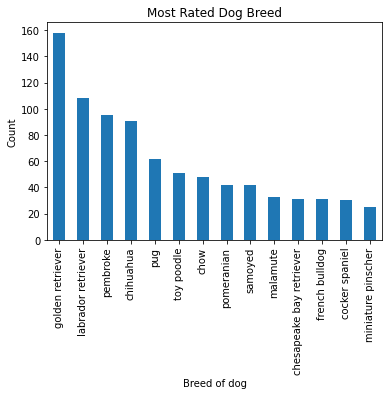

In [2070]:
df_breed = df_clean.groupby('breed').filter(lambda x: len(x) >= 25)

df_breed['breed'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Breed of dog')
plt.title('Most Rated Dog Breed')
plt.show()
fig.savefig('Breed.PNG');

<p> The most famous dog is Golden retriever

##### Insight 2):

In [2071]:
df_rating = df_clean.groupby('breed')['rating_numerator'].mean().sort_values()
df_rating = df_rating.sort_values(ascending = False)
df_rating[:10]

breed
soft-coated wheaten terrier    20.800000
west highland white terrier    14.687500
great pyrenees                 14.666667
chow                           14.166667
labrador retriever             13.638889
borzoi                         13.545455
siberian husky                 13.250000
golden retriever               13.053797
bouvier des flandres           13.000000
saluki                         12.500000
Name: rating_numerator, dtype: float64

In [2072]:
rating = pd.DataFrame({'breed':df_rating.index, 'Rate':df_rating.values})
rating.head()

breed       Rate
0  soft-coated wheaten terrier  20.800000
1  west highland white terrier  14.687500
2               great pyrenees  14.666667
3                         chow  14.166667
4           labrador retriever  13.638889

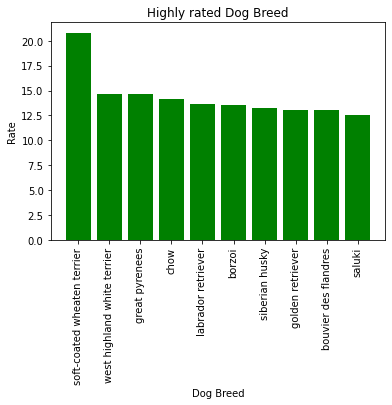

In [2073]:
x = rating.breed
y = rating.Rate
plt.bar(x[:10], y[:10], color='green')
plt.ylabel('Rate')
plt.xlabel('Dog Breed')
plt.title('Highly rated Dog Breed')
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees
plt.show()
fig.savefig('name.PNG');

##### Insight 3):

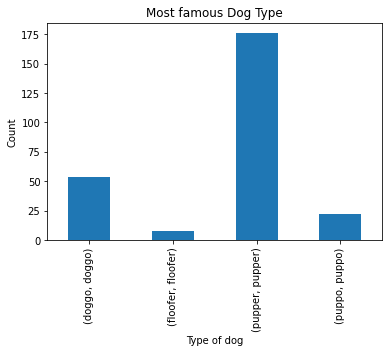

In [2074]:
df_type = df_clean.groupby('Type')

df_type['Type'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Type of dog')
plt.title('Most famous Dog Type')
plt.show()
fig.savefig('Type.PNG');

<p> Pupper is the most famous dog type

##### Insight 4):

In [2075]:
df_name = df_clean['name'].value_counts()
name = pd.DataFrame({'name':df_name.index, 'count':df_name.values})
name

name  count
0            Cooper     10
1           Charlie     10
2              Lucy     10
3            Oliver      9
4            Tucker      9
5             Penny      8
6               the      7
7             Daisy      7
8             Sadie      7
9           Winston      7
10             Koda      6
11              Jax      6
12             Toby      6
13             Lola      6
14            Bella      5
15              Leo      5
16               Bo      5
17            Oscar      5
18          Stanley      5
19            Rusty      5
20            Brody      4
21            Scout      4
22          Chester      4
23           Bailey      4
24              Gus      4
25            Alfie      4
26             Milo      4
27               an      4
28           Dexter      4
29             Duke      4
30          Scooter      4
31             Jack      4
32            Louis      4
33             Bear      4
34           George      4
35           Sophie      4
36             Finn      4
37            Larry      4
38           Oakley      4
39           Maggie      4
40           Cassie      4
41             Dave      4
42           Reggie      4
43          Bentley      4
44           Winnie      4
45        Sebastian      3
46             Kyle      3
47            Buddy      3
48            Wyatt      3
49           Boomer      3
50            Rosie      3
51              one      3
52            Gizmo      3
53           Walter      3
54            Sammy      3
55             Loki      3
56           Shadow      3
57          Wallace      3
58          Jimothy      3
59          Vincent      3
60             Zoey      3
61              Max      3
62             Zeke      3
63            Clark      3
64            Bruce      3
65          Jeffrey      3
66             Otis      3
67            Reese      3
68             Hank      3
69             just      3
70            Ellie      3
71             Ruby      3
72             very      3
73             Gary      3
74           Archie      3
75             Beau      3
76           Wilson      3
77            Olive      3
78          Malcolm      2
79           Watson      2
80           Samson      2
81         Clarence      2
82             Abby      2
83            Coops      2
84             Gabe      2
85            Fiona      2
86              Eli      2
87              Ash      2
88            Piper      2
89           Calvin      2
90              Bob      2
91             Phil      2
92          Olivi√©r      2
93        Roosevelt      2
94              Doc      2
95          Peaches      2
96            Linda      2
97           Mister      2
98           Finley      2
99          Maximus      2
100         Solomon      2
101           Derek      2
102            Juno      2
103            Lily      2
104            Nala      2
105           Benji      2
106            Dash      2
107            Jeph      2
108          Jiminy      2
109         Frankie      2
110           Frank      2
111            Kreg      2
112           Moose      2
113         Griffin      2
114            Rory      2
115            Chip      2
116          Django      2
117            Luca      2
118          Dakota      2
119           Sunny      2
120           Wally      2
121          Albert      2
122           Phred      2
123           Titan      2
124          Olivia      2
125           Atlas      2
126           Rufus      2
127           Rocky      2
128           Louie      2
129             Tyr      2
130          Herald      2
131           Lenny      2
132          Bernie      2
133             Moe      2
134             Lou      2
135           Kirby      2
136             Sam      2
137          Hunter      2
138         Kenneth      2
139            Opal      2
140            Odie      2
141           Percy      2
142         Raymond      2
143            Cody      2
144           Pippa      2
145         Calbert      2
146            Earl      2
147           Aspe

In [2076]:
x = name['name']
y= name['count']

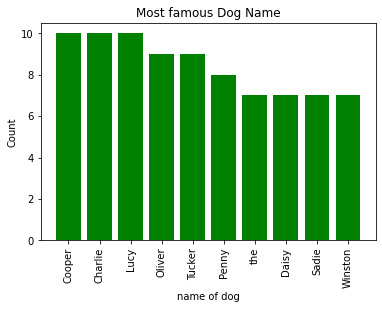

In [2077]:
plt.bar(x[:10], y[:10], color='green')
plt.ylabel('Count')
plt.xlabel('name of dog')
plt.title('Most famous Dog Name')
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees
plt.show()
fig.savefig('name.PNG');